<H1>Discrete Fourier Transformation</H1>

In [1]:
%pylab inline
from matplotlib import style
style.use('fivethirtyeight')

Populating the interactive namespace from numpy and matplotlib


<H2>Example of ideal signal</H2>

In [2]:
# create artificial wave signal
sf = 1000 # samples per second (sec^{-1})
dt = 1/sf # sampling interval (in sec)
t = np.arange(0,2, dt) # 2 seconds activity

# create a signal
PI = np.pi
wave = lambda f: np.sin(2*PI*f*t) 
signal = 2.5 * wave(4) + 1.5 * wave(6.5)# + 0.5*wave(2.4)

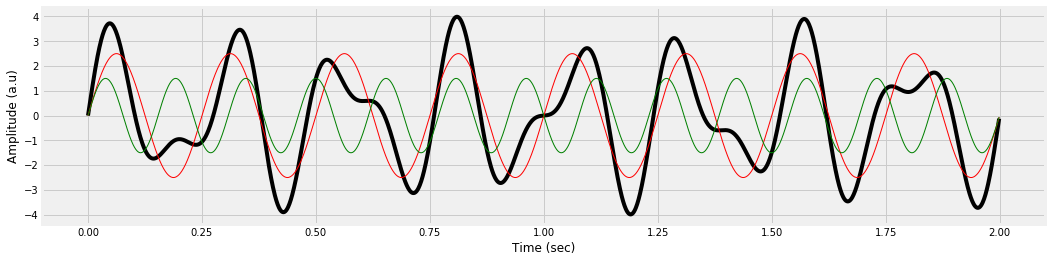

In [3]:
# plot signal and the sum of the waves
plt.figure(figsize=(16,4))
plt.plot(t,signal, lw = 4, color = 'black')
plt.plot(t, 2.5*wave(4), color='red', lw=1)
plt.plot(t, 1.5*wave(6.5), color = 'green', lw = 1)
#plt.plot(t, 0.5*wave(2.4), color= 'blue', lw = 1)
plt.xlabel("Time (sec)");plt.ylabel('Amplitude (a.u)');

<H2>Discrete Fourier transformation</H2>

In [4]:
# fourTime is the normalized time vector: we need a complex wave which is having the same
# number of points as the signal we want to analyze. It's important to keep the phase!

# you want the wave to start at zero.
FourierTime = np.arange(signal.size)/signal.size

In [5]:
# create a complex wave with the Eulers formula e^ik that depends only on the frequency
csw = lambda freq: np.exp( -1j*2*PI*freq*FourierTime )

In [6]:
# dot product of complex waves and signal for waves with frequencies betwen 0 and number of samples
# of the signal. It will return the Fourier coefficients (amplitude and phase) for every frequency.
FourierCoeff = list()
for f in range(len(t)):
    FourierCoeff.append( np.dot(signal, csw(f))/ signal.size ) # normalize the dot product

In [7]:
# now compute amplitudes
amp = 2*np.abs(FourierCoeff)

In [8]:
# and compute phases (in rad)
phi = np.angle(FourierCoeff)

In [9]:
# compute frequencies vector, it goes from zero (DC component) 
# to half the sampling frequency (Nyquist)
# n/2 + 1 for the offset
Nyquist = sf/2
print('Nyquist frequency is {:2.2f} Hz'.format(Nyquist))

Fresolution = (sf/signal.size)
print('Frequency resoultion is {:2.4f} Hz'.format(Fresolution))

# n/2 + 1 is to take only the possitive frequencies 
Nsamples = math.floor(signal.size/2)
hz = np.linspace(0, Nyquist, num = int(Nsamples) + 1 )

Nyquist frequency is 500.00 Hz
Frequency resoultion is 0.5000 Hz


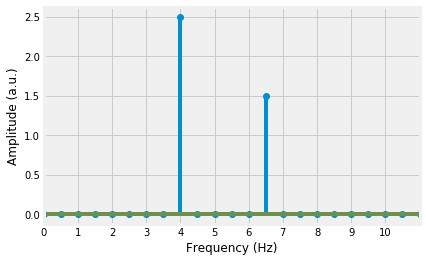

In [10]:
# plot frequencies vs amp
plt.stem(hz, amp[:len(hz)], use_line_collection = True)
plt.xlabel('Frequency (Hz)'), plt.ylabel('Amplitude (a.u.)')
plt.xticks(range(11));
plt.xlim(0,11);

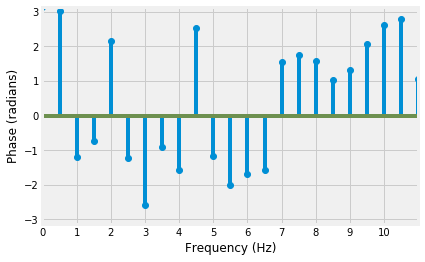

In [11]:
# plot phases vs freq
plt.stem(hz, phi[:len(hz)], use_line_collection = True)
plt.xlabel('Frequency (Hz)'), plt.ylabel('Phase (radians)')
plt.ylim(-np.pi, np.pi)
plt.xticks(range(11));
plt.xlim(0,11);

/Users/segundo.martinez/miniconda3/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


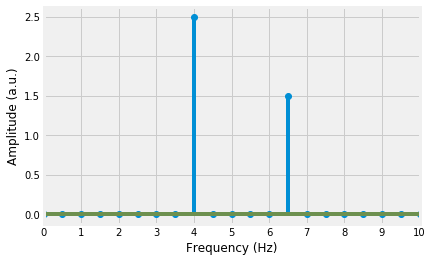

In [12]:
# with python fft
FourierCoeff = np.fft.fft(signal)/signal.size
ampl = 2*np.abs(FourierCoeff)  
phi = np.angle(FourierCoeff)

# compute frequencies vector until half the sampling rate
hz = np.linspace(0, sf/2., num = math.floor(signal.size/2) + 1 )

plt.stem(hz,ampl[:len(hz)])#, use_line_collection = True)
plt.xlabel('Frequency (Hz)'), plt.ylabel('Amplitude (a.u.)')
plt.xticks(range(11));
plt.xlim(0,10);

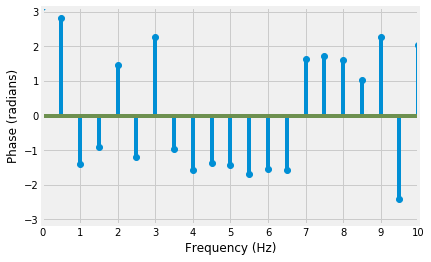

In [13]:
# plot phases vs freq
plt.stem(hz, phi[:len(hz)], use_line_collection = True)
plt.xlabel('Frequency (Hz)'), plt.ylabel('Phase (radians)')
plt.ylim(-np.pi, np.pi)
plt.xticks(range(11));
plt.xlim(0,10);

<H2>A real example</H2>

Nyquist frequency is 3.00 per hour
Frequency resoultion is 0.0420 per hour


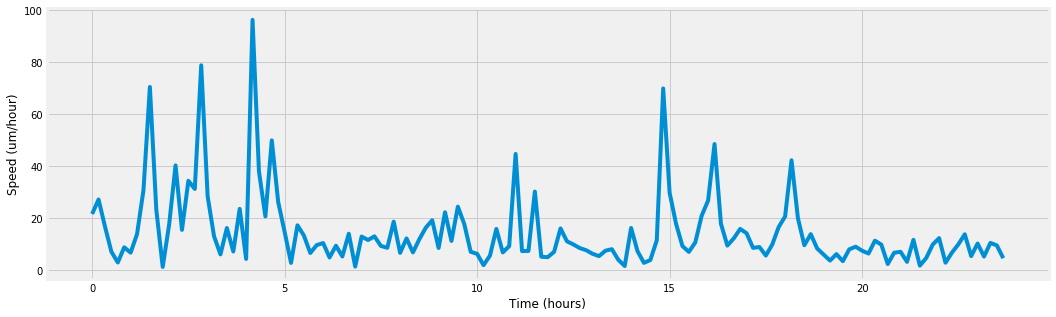

In [14]:
speed = np.loadtxt('speed.txt')

sf = 6 # samples per hour
dt = 1/sf # write sampling points in hours -1 (i.e., 6 per hour )

Nyquist = sf/2
print('Nyquist frequency is {:2.2f} per hour'.format(Nyquist))
# Nyquist frequency is 3 per hour, which is the fastest frequency we can get.
# We can have something one every 7 hours (1/7 = 0.14 ) which is slower, it can be resolved
Fresolution = (sf/speed.size)
print('Frequency resoultion is {:2.4f} per hour'.format(Fresolution))
t = np.arange(0, speed.size*dt, dt)

fig = figure(figsize=(16,5))
ax = fig.add_subplot(111)
ax.plot(t, speed)
ax.set_xlabel('Time (hours)');
ax.set_ylabel('Speed (um/hour)');
#ax.set_xticks(range(0, 25, 6));

In [15]:
# fourTime is the normalized time
normt = np.arange(speed.size)/speed.size

# create a complex wave
csw = lambda freq: np.exp( -1j*2*np.pi*freq*normt )

In [16]:
# dot product of complex waves and signal for waves betwen 0 and half the time of the recording
FourierCoeff = list()
for f in range(speed.size):
    FourierCoeff.append( np.dot(speed, csw(f))/speed.size)

In [17]:
# now compute amplitudes
# extract amplitudes
ampl = 2*np.abs(FourierCoeff)

In [18]:
phi = np.angle(FourierCoeff)

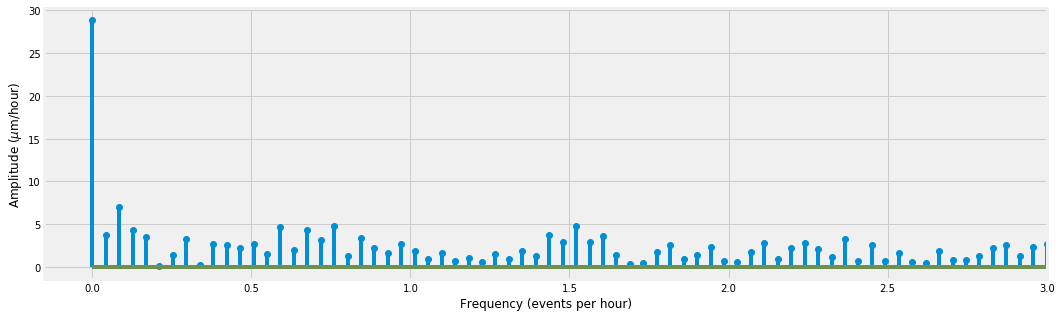

In [19]:
# compute frequencies vector
hz = np.linspace(0, sf/2., num = math.floor(speed.size/2) + 1 )
fig = figure(figsize=(16,5))
plt.stem(hz,ampl[:len(hz)], use_line_collection = True)
plt.xlabel('Frequency (events per hour)'), plt.ylabel('Amplitude ($\mu$m/hour)')
plt.xlim(xmax=3);

/Users/segundo.martinez/miniconda3/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


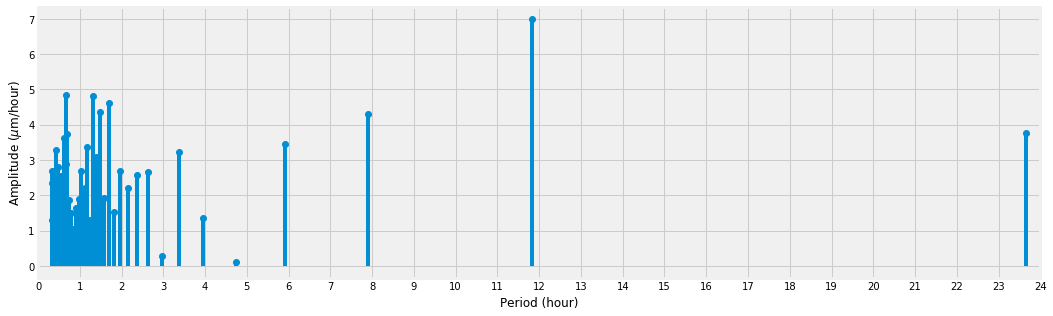

In [20]:
FourierCoeff = np.fft.fft(speed)/len(speed)
ampl = 2*np.abs(FourierCoeff)

# compute frequencies vector
hz = np.linspace(0, sf/2., num=math.floor(len(speed)/2.)+1 )
fig = figure(figsize=(16,5))
plt.stem(1/hz,ampl[:len(hz)], use_line_collection = True)
plt.xlabel('Period (hour)'), plt.ylabel('Amplitude ($\mu$m/hour)')
plt.xticks(arange(25))
plt.xlim(xmin =0, xmax=24);

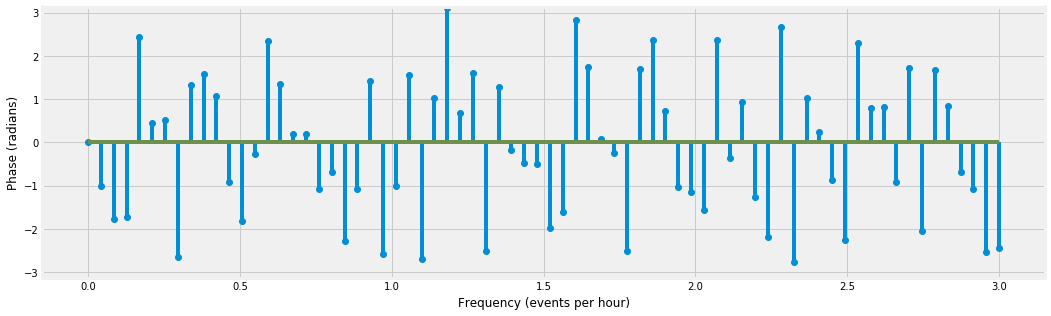

In [21]:
# compute phase vector
phi = np.angle(FourierCoeff)
fig = figure(figsize=(16,5))
plt.stem(hz,phi[:len(hz)], use_line_collection = True)
plt.xlabel('Frequency (events per hour)'), plt.ylabel('Phase (radians)')
plt.ylim(-np.pi, np.pi);

<H3>Calculate the three most predominant frequencies</H3>

We don't include the DC frequency and test only until Nysquid.

In [22]:
myamps = ampl[1:hz.size] # from 1 to Nysquid
x = abs(np.sort(myamps*-1))
mysel = x[:10] # take the 10 higher frequencies

idx = np.array([np.where(myamps==i) for i in mysel] ) +1
for i in idx:
    info = (i, float(amp[i]), 1/float(hz[i]), float(phi[i]) )
    print('Index = %d, Amplitude = %2.3f um/hour, period = %2.4f hours, phase = %2.4f radians'%info)


Index = 2, Amplitude = 0.000 um/hour, period = 11.8333 hours, phase = -1.7676 radians
Index = 36, Amplitude = 0.000 um/hour, period = 0.6574 hours, phase = -1.9834 radians
Index = 18, Amplitude = 0.000 um/hour, period = 1.3148 hours, phase = -1.0768 radians
Index = 14, Amplitude = 0.000 um/hour, period = 1.6905 hours, phase = 2.3417 radians
Index = 16, Amplitude = 0.000 um/hour, period = 1.4792 hours, phase = 0.2015 radians
Index = 3, Amplitude = 0.000 um/hour, period = 7.8889 hours, phase = -1.7172 radians
Index = 1, Amplitude = 0.000 um/hour, period = 23.6667 hours, phase = -1.0161 radians
Index = 34, Amplitude = 0.000 um/hour, period = 0.6961 hours, phase = -0.4737 radians
Index = 38, Amplitude = 0.000 um/hour, period = 0.6228 hours, phase = 2.8211 radians
Index = 4, Amplitude = 0.000 um/hour, period = 5.9167 hours, phase = 2.4426 radians


In [23]:
np.mean(speed)

14.436838153846155

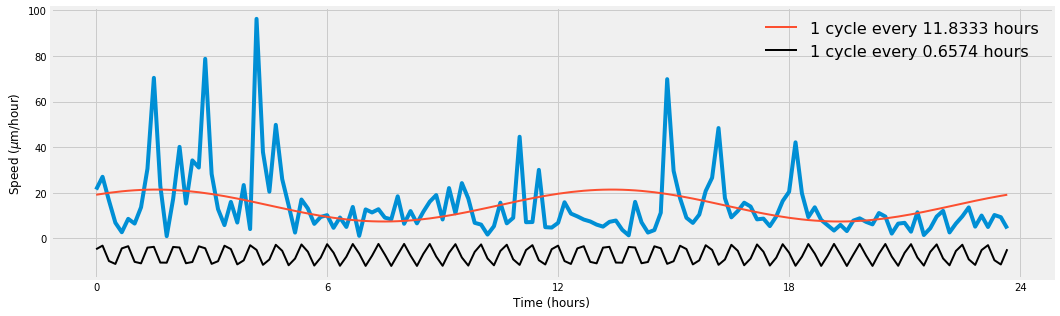

In [24]:
offset = np.mean(speed)
wave1 = offset + ampl[2]*(np.sin(2*np.pi*hz[2]*t - np.rad2deg(phi[2])))
wave2 = -offset/2 + ampl[36]*(np.sin(2*np.pi*hz[36]*t - np.rad2deg(phi[36])))

fig = figure(figsize=(16,5))
ax = fig.add_subplot(111)
ax.plot(t, speed)

ax.plot(t, wave1, lw = 2, label='1 cycle every {:2.4f} hours'.format(1/hz[2]) )
ax.plot(t, wave2, lw = 2, color='black',label='1 cycle every {:2.4f} hours'.format(1/hz[36]))

ax.set_xlabel('Time (hours)');
ax.set_ylabel('Speed ($\mu$m/hour)');
ax.set_xticks(range(0, 25, 6));
ax.legend(fontsize =16, frameon=False)
#fig.savefig('Speed.png')

<H2>Calculate the DC component</H2>

In [25]:
DC = [np.abs(FourierCoeff[0])]

amp = np.concatenate( (DC, 2*np.abs(FourierCoeff[1:])) )
print('DC component is {}'.format(DC) )
print('Speed average is {:2.4f}'.format(speed.mean()) )

DC component is [14.436838153846152]
Speed average is 14.4368


/Users/segundo.martinez/miniconda3/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


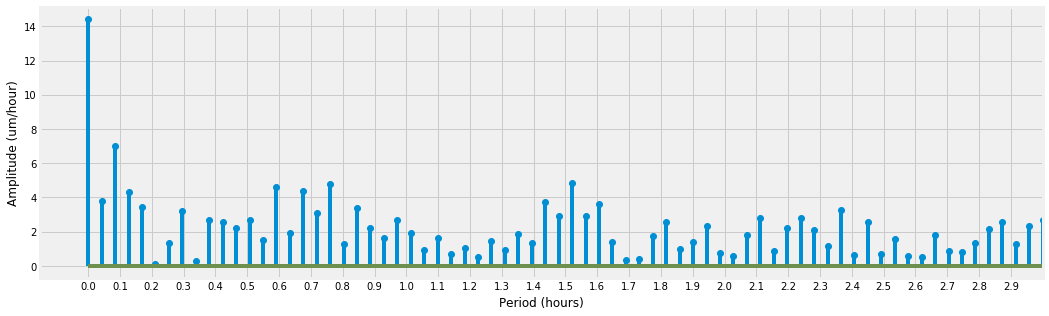

In [26]:
# compute frequencies vector
hz = np.linspace(0, sf/2., num=math.floor(len(speed)/2.)+1 )
fig = figure(figsize=(16,5))
plt.stem(hz,amp[:len(hz)])#, use_line_collection = True)
plt.xlabel('Period (hours)'), plt.ylabel('Amplitude (um/hour)')
plt.xticks(arange(0,3,.1))
plt.xlim(xmax=3);

<H2>Select 6 seconds window</H2>

Nyquist frequency is 3.00 per hour
Frequency resoultion is 0.1667 per hour


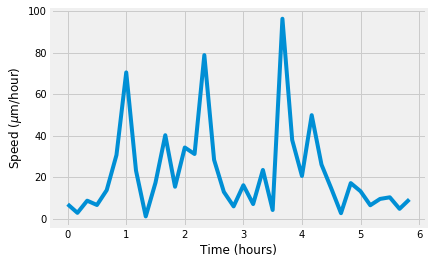

In [27]:
signal2 = speed[int(0.5*sf):int(6.5*sf)]
time2 = np.arange(signal2.size)*dt
plt.plot(time2, signal2)
plt.xlabel('Time (hours)');
plt.ylabel('Speed ($\mu$m/hour)');
Nyquist = sf/2
print('Nyquist frequency is {:2.2f} per hour'.format(Nyquist))
Fresolution = (sf/signal2.size)
print('Frequency resoultion is {:2.4f} per hour'.format(Fresolution))

In [28]:
# Computer Fourier coefficients (amplitudes and phases)
FourierCoeff = np.fft.fft(signal2)/signal2.size

DC = [np.abs(FourierCoeff[0])]
amp = np.concatenate((DC, 2*np.abs(FourierCoeff[1:])))
phi = np.angle(FourierCoeff)

Nsamples = math.floor(signal2.size/2)
hz = np.linspace(0, Nyquist, num = int(Nsamples)+ 1)

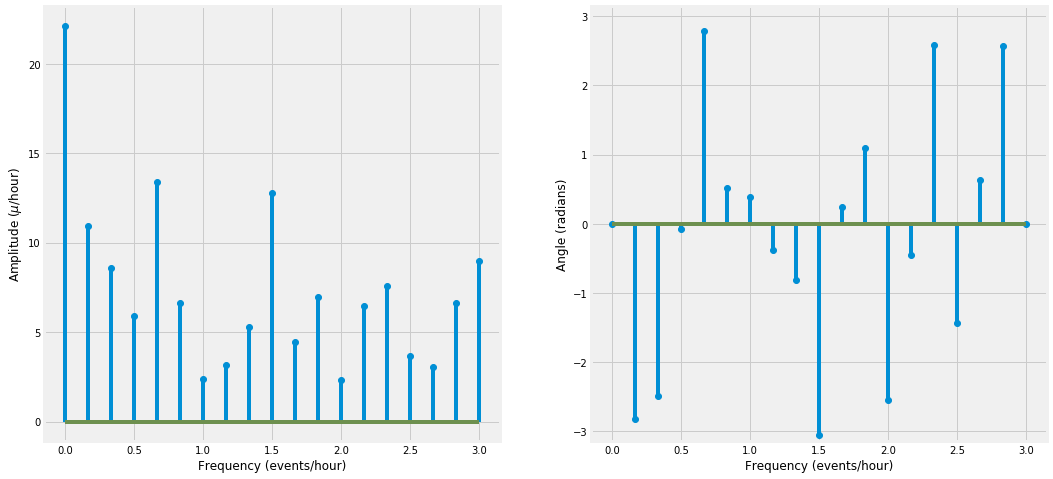

In [29]:
fig, ax = plt.subplots(1,2, figsize=(16,8))

ax[0].stem(hz, amp[:hz.size], use_line_collection=True);
ax[0].set_xlabel('Frequency (events/hour)')
ax[0].set_ylabel("Amplitude ($\mu$/hour)")

ax[1].stem(hz, phi[:hz.size], use_line_collection=True);
ax[1].set_ylim(-PI, PI)
ax[1].set_ylabel('Angle (radians)')

for myax in ax:
    myax.set_xlabel('Frequency (events/hour)')

In [30]:
# most predominant frequencies
myamps = amp[1:hz.size] # from 1 to Nysquid
x = abs(np.sort(myamps*-1))
mysel = x[:10] # take the 10 higher frequencies

idx = np.array([np.where(myamps==i) for i in mysel] ) +1
for i in idx:
    info = (i, float(amp[i]), 1/float(hz[i]), float(phi[i]) )
    print('Index = %d, Amplitude = %2.3f um/hour, period = %2.4f hours, phase = %2.4f radians'%info)


Index = 4, Amplitude = 13.366 um/hour, period = 1.5000 hours, phase = 2.7849 radians
Index = 9, Amplitude = 12.803 um/hour, period = 0.6667 hours, phase = -3.0520 radians
Index = 1, Amplitude = 10.939 um/hour, period = 6.0000 hours, phase = -2.8245 radians
Index = 18, Amplitude = 8.981 um/hour, period = 0.3333 hours, phase = 0.0000 radians
Index = 2, Amplitude = 8.571 um/hour, period = 3.0000 hours, phase = -2.4888 radians
Index = 14, Amplitude = 7.562 um/hour, period = 0.4286 hours, phase = 2.5823 radians
Index = 11, Amplitude = 6.942 um/hour, period = 0.5455 hours, phase = 1.0923 radians
Index = 5, Amplitude = 6.634 um/hour, period = 1.2000 hours, phase = 0.5228 radians
Index = 17, Amplitude = 6.622 um/hour, period = 0.3529 hours, phase = 2.5674 radians
Index = 13, Amplitude = 6.476 um/hour, period = 0.4615 hours, phase = -0.4547 radians


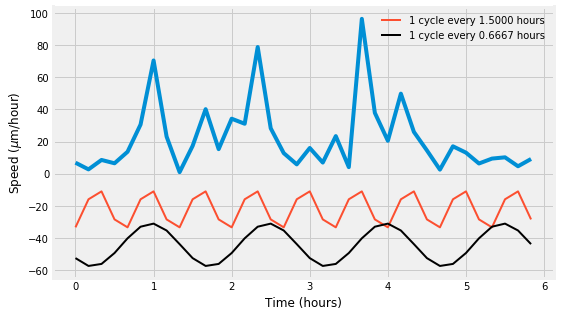

In [31]:
offset = np.mean(signal2)
wave2 = -offset + amp[9]*(np.sin(2*PI*hz[9]*time2 - np.rad2deg(phi[9])))
wave1 = -2*offset + amp[4]*(np.sin(2*PI*hz[4]*time2 - np.rad2deg(phi[4])))

fig = figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.plot(time2, signal2)

ax.plot(time2, wave2, lw = 2, label='1 cycle every {:2.4f} hours'.format(1/hz[4]) )

ax.plot(time2, wave1, lw = 2, color= 'black', label='1 cycle every {:2.4f} hours'.format(1/hz[9]))

ax.set_xlabel('Time (hours)');
ax.set_ylabel('Speed ($\mu$m/hour)');
#ax.set_xticks(range(0, 25, 6));
ax.legend(frameon=False)